# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from pathlib import Path
from joblib import dump
from joblib import load



from helper import *
from cnn_and_all import *
from svm_and_all import *

# Paths to raw vibration data
data_paths = [Path('./12k_DE_0'), Path('./12k_DE_1'), Path('./12k_DE_2'), Path('./12k_DE_3')]

# Data Preprocessing 

Read the raw vibration data of different load conditions.

12k is the sampling rate; DE stands for drive end; 0, 1, 2, 3 is the load condition (unit = hp)

Read data files in the paths and construct the data frames, then store them back in their original directory

In [4]:
for data_path in data_paths:
    data_preprocess(data_path)

# CNN Model

## Train CNN Models 

In [2]:
for data_path in data_paths:
    file = 'processed.csv'
    df = pd.read_csv(f'./{data_path}/{file}')
    
    # Just to have a train_loader to train CNN model
    train_loader, test_loader = train_test_loader(df, random_state=random_state)
    
    # Define model, loss function, optimizer
    model = ConvNet().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    # Train the model
    train_cnn(model, train_loader, criterion, optimizer)

    # Save the model state 
    PATH = f'./{data_path}/cnn.pth'
    torch.save(model.state_dict(), PATH)
    
# save the report
dump(reports_cnn, 'reports_cnn.joblib')

NameError: name 'random_state' is not defined

## CNN Models Evaluation

Accuracy of the network: 98.88888888888889 %
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '7': {'precision': 0.9, 'recall': 1.0, 'f1-score': 0.9473684210526316, 'support': 18}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '9': {'precision': 1.0, 'recall': 0.8888888888888888, 'f1-score': 0.9411764705882353, 'support': 18}, 'accuracy': 0.9888888888888889, 'macro avg': {'precision': 0.99, 'recall': 0.9888888888888889, 'f1-score': 0.9888544891640867, 'support': 180}, 'weighted avg': {'prec

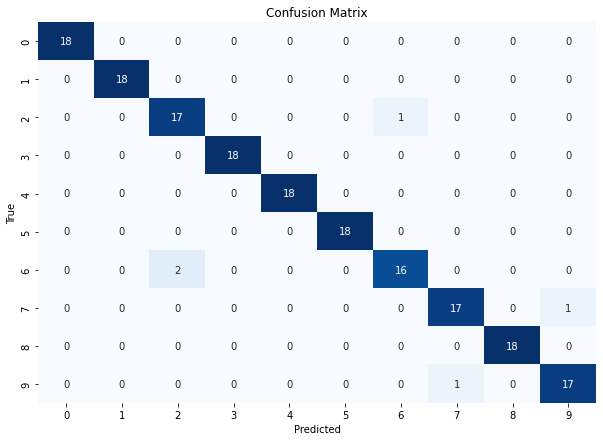

Accuracy of the network: 98.33333333333333 %
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '2': {'precision': 0.9473684210526315, 'recall': 1.0, 'f1-score': 0.972972972972973, 'support': 18}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '7': {'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1-score': 0.9444444444444444, 'support': 18}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '9': {'precision': 0.9411764705882353, 'recall': 0.8888888888888888, 'f1-score': 0.9142857142857143, 'support': 18}, 'accuracy': 0.9833333333333333, 'macro avg': {'precision': 0.9832989336085312, 'recall': 0.9

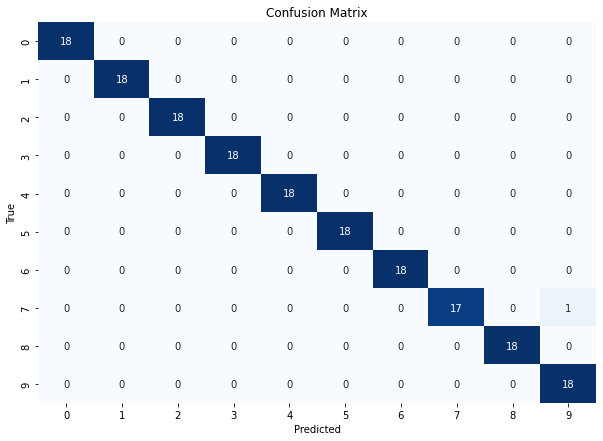

Accuracy of the network: 98.88888888888889 %
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '2': {'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1-score': 0.9444444444444444, 'support': 18}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '8': {'precision': 0.9444444444444444, 'recall': 0.9444444444444444, 'f1-score': 0.9444444444444444, 'support': 18}, '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, 'accuracy': 0.9888888888888889, 'macro avg': {'precision': 0.9888888888888889, 'recall': 0.9888888888888889, 'f1-score': 

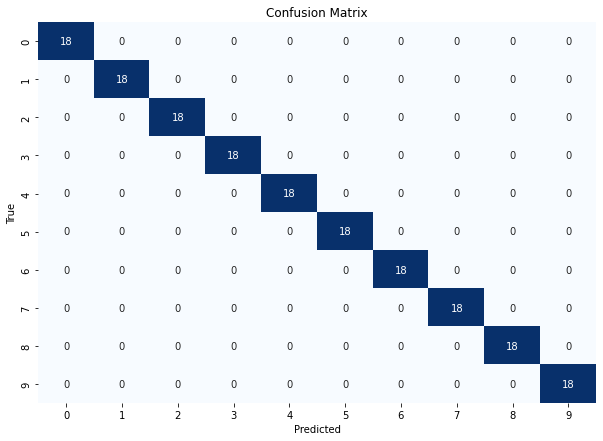

Accuracy of the network: 100.0 %
Classification Report:
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 180}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 180}}
Accuracy of the network: 100.0 %
Classifi

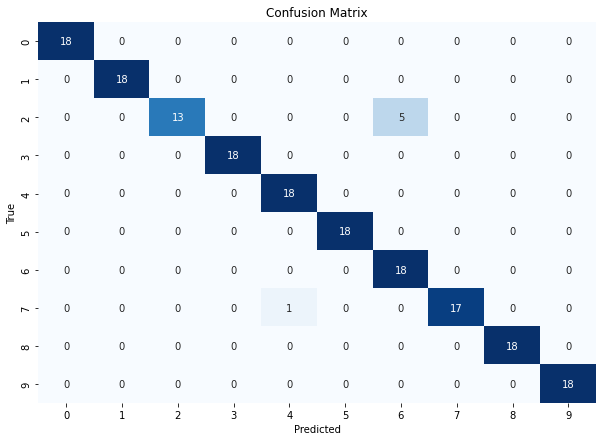

['reports_cnn.joblib']

In [2]:
random_states = [i for i in range(10)]
reports_cnn = {}
for data_path in data_paths:
    # Read data into a data frame
    file = 'processed.csv'
    df = pd.read_csv(f'./{data_path}/{file}')
    
    # # Define model
    # model = ConvNet().to(device)
    # # Load model
    # model.load_state_dict(torch.load(f'./{data_path}/cnn.pth'))
    
    one_report = {} # to hold the classification report for each dataset
    
    # Implemt train and test 10 times with different random state
    for random_state in random_states:
        # Create train loader and test loader
        train_loader, test_loader = train_test_loader(df, random_state=random_state)
        
        # Define model, loss function, optimizer
        model = ConvNet().to(device)
        model.load_state_dict(torch.load(f'./{data_path}/cnn.pth'))
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        # Train the model
        train_cnn(model, train_loader, criterion, optimizer)

        # Evaluate the model
        cm, class_report = evaluate_cnn(model, test_loader)
        
        # Store each trial report
        one_report[f'random_state={random_state}'] = class_report
    plot_confusion_matrix_(cm, data_path, model='cnn')
        
    # Store each dataset report 
    reports_cnn[f'{data_path}'] = one_report
    
dump(reports_cnn, 'reports_cnn.joblib')

In [6]:
# load the report
reports_cnn = load('reports_cnn.joblib')
cnn_over_all = overall_model_eval(reports_cnn)

12k_DE_0
accuracy: Mean = 0.9594, std = 0.0232
precision: Mean = 0.9627, std = 0.0201
recall: Mean = 0.9594, std = 0.0232
f1-score: Mean = 0.9585, std = 0.0247
---------------------
12k_DE_1
accuracy: Mean = 0.9889, std = 0.0075
precision: Mean = 0.9899, std = 0.0062
recall: Mean = 0.9889, std = 0.0075
f1-score: Mean = 0.9888, std = 0.0076
---------------------
12k_DE_2
accuracy: Mean = 0.9867, std = 0.0292
precision: Mean = 0.9891, std = 0.0224
recall: Mean = 0.9867, std = 0.0292
f1-score: Mean = 0.9863, std = 0.0303
---------------------
12k_DE_3
accuracy: Mean = 0.9917, std = 0.0130
precision: Mean = 0.9927, std = 0.0111
recall: Mean = 0.9917, std = 0.0130
f1-score: Mean = 0.9916, std = 0.0131
---------------------


In [7]:
f1_each_class_cnn = f1_score_class(reports_cnn)

12k_DE_0
0_f1-score: Mean = 1.0000, std = 0.0000
1_f1-score: Mean = 0.9851, std = 0.0366
2_f1-score: Mean = 0.9502, std = 0.0419
3_f1-score: Mean = 0.9881, std = 0.0277
4_f1-score: Mean = 0.9920, std = 0.0169
5_f1-score: Mean = 0.9868, std = 0.0213
6_f1-score: Mean = 0.9608, std = 0.0427
7_f1-score: Mean = 0.8907, std = 0.0522
8_f1-score: Mean = 0.9800, std = 0.0228
9_f1-score: Mean = 0.8512, std = 0.0948
---------------------
12k_DE_1
0_f1-score: Mean = 1.0000, std = 0.0000
1_f1-score: Mean = 1.0000, std = 0.0000
2_f1-score: Mean = 0.9859, std = 0.0193
3_f1-score: Mean = 1.0000, std = 0.0000
4_f1-score: Mean = 1.0000, std = 0.0000
5_f1-score: Mean = 1.0000, std = 0.0000
6_f1-score: Mean = 0.9973, std = 0.0081
7_f1-score: Mean = 0.9549, std = 0.0307
8_f1-score: Mean = 1.0000, std = 0.0000
9_f1-score: Mean = 0.9500, std = 0.0433
---------------------
12k_DE_2
0_f1-score: Mean = 1.0000, std = 0.0000
1_f1-score: Mean = 0.9759, std = 0.0724
2_f1-score: Mean = 0.9648, std = 0.0536
3_f1-scor

In [8]:
f1_cnn = {}
for key, values in f1_each_class_cnn.items():
    f1_cnn[key] = []
    for f1_class in values.values():
        print(f1_class[0])
        f1_cnn[key].append(f1_class[0])

1.0
0.9851021753460778
0.9502487405583381
0.9880519480519482
0.9920341394025606
0.9867709815078236
0.9607600081284293
0.8907284865837498
0.9799727458550989
0.851212587536117
1.0
1.0
0.9858550987962753
1.0
1.0
1.0
0.9972972972972972
0.9548933198740646
1.0
0.9500392368513811
1.0
0.9758620689655173
0.9648204277616041
1.0
1.0
0.9896049896049897
0.9972972972972973
0.9971428571428571
0.9658730158730158
0.9722972972972972
1.0
0.9941176470588236
0.9784655623365299
0.9971428571428571
0.9972972972972973
0.9865934065934067
0.9851021753460778
0.9853492453492454
0.9971428571428571
0.9945945945945945


In [18]:
f1_cnn

{'12k_DE_0': [1.0,
  1.0,
  0.9488694393535175,
  1.0,
  0.9915216682958619,
  0.9911463187325257,
  0.9657928027098774,
  0.935240430657632,
  0.995674183156926,
  0.9117146967146967],
 '12k_DE_1': [1.0,
  1.0,
  0.9720447720447721,
  1.0,
  1.0,
  0.986391147768197,
  0.9952380952380953,
  0.9549015911515912,
  0.995674183156926,
  0.940000830323411],
 '12k_DE_2': [1.0,
  0.9971428571428571,
  0.9529885100723012,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9584360841358812,
  0.9965517241379309],
 '12k_DE_3': [0.9954545454545455,
  0.9895195195195194,
  0.9674060365972131,
  1.0,
  1.0,
  0.9971428571428571,
  1.0,
  1.0,
  0.9501577951189464,
  1.0]}

# GL-mRMR-SVM Model

## Local Features Extraction

Read the preprocessed data files, extract the local feature and save them in their original directory

In [2]:
for data_path in data_paths:
    extract_local_features(data_path)

           score 0       score 1       score 2       score 3       score 4  \
0     1.000000e+00  0.000000e+00  5.176603e-39  0.000000e+00  0.000000e+00   
1     1.000000e+00  0.000000e+00  8.914440e-36  0.000000e+00  0.000000e+00   
2     1.000000e+00  0.000000e+00  1.997467e-40  0.000000e+00  0.000000e+00   
3     1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4     1.000000e+00  0.000000e+00  2.761951e-39  0.000000e+00  0.000000e+00   
...            ...           ...           ...           ...           ...   
1175  2.515251e-12  1.457739e-11  2.602701e-06  4.784926e-10  1.743486e-06   
1176  1.453995e-10  1.378456e-10  4.186823e-03  4.349761e-06  2.395458e-03   
1177  1.118033e-11  1.417296e-08  4.369966e-06  7.790563e-09  8.289758e-06   
1178  3.156964e-08  5.857769e-09  1.193762e-04  1.536095e-05  9.955206e-07   
1179  3.708953e-10  6.339002e-12  4.676387e-03  6.795992e-06  2.822007e-03   

           score 5       score 6   score 7       score 8   scor

## Global Features Extraction

Read the preprocessed data files, extract the global feature and save them in their original directory

In [ ]:
for data_path in data_paths:
    extract_global_features(data_path)

## Features Fusion

Read the global and local features files, combine them.

In [3]:
for data_path in data_paths:
    fuse_features(data_path)

## Feature Selection with mRMR algorithm
Select k = 8, 10, 12, 14 ,16 ,18, 20 features.

In [62]:
K = [i for i in range(35)]

for data_path in data_paths:
    for k in K:
        select_features(data_path,k=k, in_file='gl_fts.csv')

0it [00:00, ?it/s]
100%|██████████| 35/35 [00:04<00:00,  7.94it/s]
0it [00:00, ?it/s]
100%|██████████| 35/35 [00:04<00:00,  7.88it/s]
0it [00:00, ?it/s]
100%|██████████| 35/35 [00:04<00:00,  8.54it/s]
0it [00:00, ?it/s]
100%|██████████| 35/35 [00:04<00:00,  8.50it/s]


## Train GL-mRMR-SVM Model

Train GL-mRMR-SVM Model with different values of k 

In [41]:
param_grid = {
        "C": [1, 10, 100],
        "gamma": [0.01, 0.05, 0.1],
        "kernel": ["rbf"]
}

# A dictionary contains all models
gl_mrmr_svm_models = {}

K = [i for i in range(1,36)]

for data_path in data_paths:
    k_svm_models = {}
    for k in K:
        file = f'selected_{k}_fts.csv'
        k_svm_models[k] = svm_model(path=data_path, file=file, param_grid=param_grid)
        
    gl_mrmr_svm_models[f'{data_path}'] = k_svm_models

dump(gl_mrmr_svm_models, 'gl_mrmr_svm_models.joblib')

['gl_mrmr_svm_models.joblib']

In [42]:
# loads the models
gl_mrmr_svm_models = load('gl_mrmr_svm_models.joblib')

In [42]:
gl_mrmr_svm_models

{'12k_DE_0': {1: (SVC(C=1, gamma=0.01),
   {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}),
  2: (SVC(C=1, gamma=0.01), {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}),
  3: (SVC(C=100, gamma=0.1), {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}),
  4: (SVC(C=100, gamma=0.1), {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}),
  5: (SVC(C=1, gamma=0.01), {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}),
  6: (SVC(C=100, gamma=0.05), {'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}),
  7: (SVC(C=10, gamma=0.05), {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}),
  8: (SVC(C=100, gamma=0.05), {'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}),
  9: (SVC(C=100, gamma=0.1), {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}),
  10: (SVC(C=100, gamma=0.1), {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}),
  11: (SVC(C=100, gamma=0.1), {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}),
  12: (SVC(C=100, gamma=0.1), {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}),
  13: (SVC(C=100, gamma=0.05), {'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}),
  14: (SVC(C=100, gamma=0.05), {

## K Consideration

Test on data set A for each number of k as shown above, 10 experiment each. 
Plot the bar chart of accuracy for each.

In [43]:
param_grid = {
        "C": [1, 10, 100],
        "gamma": [0.01, 0.05, 0.1],
        "kernel": ["rbf"]
}

# loads the models
gl_mrmr_svm_models = load('gl_mrmr_svm_models.joblib')
random_states = [i for i in range(10)]
k_reports = {}
K = [i for i in range(8,36)]
for data_path in data_paths:
    k_reports[f'{data_path}'] = {}
    for k in K:
        k_reports[f'{data_path}'][k] = {}
        file = f'selected_{k}_fts.csv'
        #model = gl_mrmr_svm_models[f'{data_path}'][k][0]
        trial_report = {}
        for random_state in random_states:
            model = svm_model(path=data_path, file=file, random_state=random_state, param_grid=param_grid)[0]
            trial_report[f'rnd_{random_state}'] = classify_svm(model=model, path=data_path, file=file, random_state=random_state, show=False)
        k_reports[f'{data_path}'][k] = trial_report
        
dump(k_reports, 'reports_mrmr.joblib')

['reports_mrmr.joblib']

In [47]:
report_mrmr = load('reports_mrmr.joblib')

all_accuracies_k = {}
for data_path in data_paths:
    all_accuracies_k[f'{data_path}'] = {}
    for k, rnds in report_mrmr[f'{data_path}'].items():
        all_accuracies_k[f'{data_path}'][k] = []
        for rnd in rnds.values():
            #print(rnd[0])
            all_accuracies_k[f'{data_path}'][k].append(rnd[0]['accuracy'])

print(all_accuracies_k)

{'12k_DE_0': {8: [0.9222222222222223, 0.9444444444444444, 0.9055555555555556, 0.9277777777777778, 0.9111111111111111, 0.9222222222222223, 0.9444444444444444, 0.9277777777777778, 0.9055555555555556, 0.9166666666666666], 9: [0.9555555555555556, 0.9611111111111111, 0.9444444444444444, 0.9611111111111111, 0.9611111111111111, 0.9611111111111111, 0.9666666666666667, 0.9611111111111111, 0.9222222222222223, 0.95], 10: [0.9833333333333333, 0.9777777777777777, 0.9888888888888889, 0.9888888888888889, 0.9888888888888889, 0.9666666666666667, 0.9777777777777777, 0.9944444444444445, 0.9444444444444444, 0.9777777777777777], 11: [0.9777777777777777, 0.9777777777777777, 0.9888888888888889, 0.9888888888888889, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9444444444444444, 0.9777777777777777], 12: [0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9888888888888889, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9888888888888889, 0.94444444444

In [48]:
acc_std = {}
accuracies = {}
for data_path in data_paths:
    accuracies = all_accuracies_k[f'{data_path}']
    k_values = sorted(accuracies.keys())
    average_accuracy = [np.mean(accuracies[k])*100 for k in k_values]
    standard_deviation = [np.std(accuracies[k], ddof=1) for k in k_values]  # ddof=1 for sample standard deviation
    acc_std[f'{data_path}'] = (average_accuracy, standard_deviation)
    
dump(acc_std, 'acc_std_ks.joblib')

['acc_std_ks.joblib']

In [51]:
acc_std

{'12k_DE_0': ([92.27777777777779,
   95.44444444444444,
   97.88888888888889,
   97.88888888888889,
   97.88888888888889,
   99.1111111111111,
   99.05555555555556,
   99.05555555555556,
   99.3888888888889,
   99.44444444444444,
   99.55555555555556,
   99.3888888888889,
   99.49999999999999,
   99.66666666666667,
   99.72222222222221,
   99.55555555555556,
   99.83333333333334,
   99.8888888888889,
   99.8888888888889,
   99.8888888888889,
   99.77777777777777,
   99.83333333333333,
   99.8888888888889,
   99.8888888888889,
   99.94444444444443,
   99.94444444444443,
   99.8888888888889,
   99.88888888888887],
  [0.013968905307886003,
   0.013042086564191856,
   0.014534382866924891,
   0.012776435785674332,
   0.012776435785674334,
   0.008364140585656465,
   0.008302411767207377,
   0.007878536068956549,
   0.004864416865393972,
   0.005237828008789249,
   0.0023424278964210136,
   0.004099248818736805,
   0.003153590067764137,
   0.003884477215444992,
   0.0029280348705262665,
   

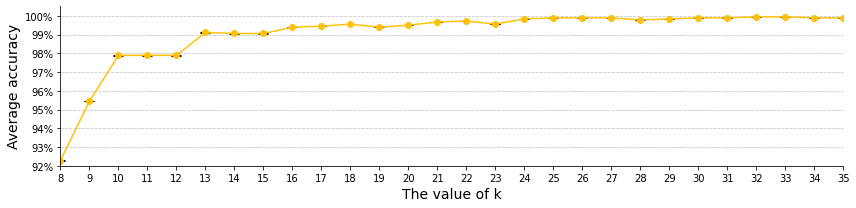

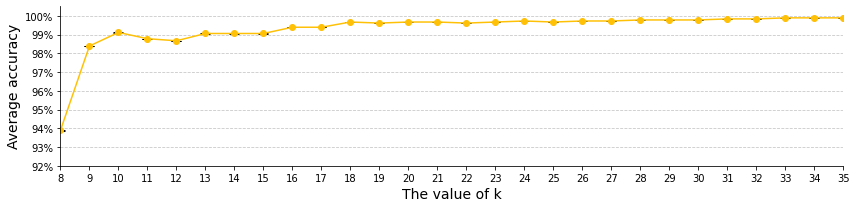

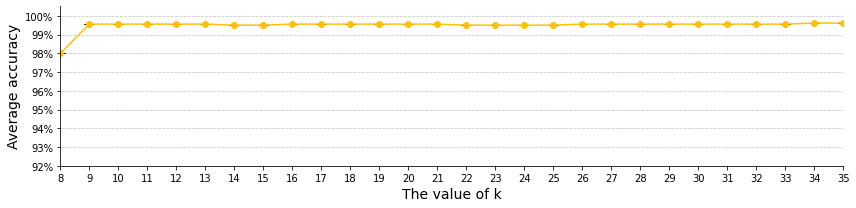

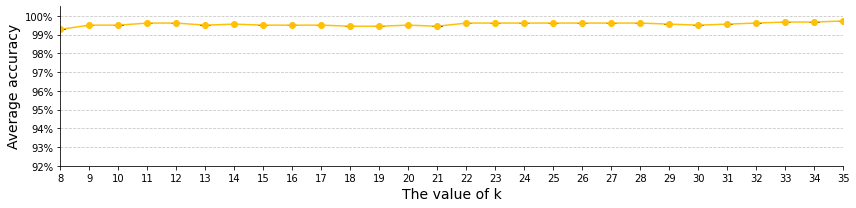

In [50]:
acc_std = load('acc_std_ks.joblib')
k_values = [i for i in range(8,36)]


for dataset, (acc, std) in acc_std.items():
    
    # Plot
    plt.figure(figsize=(12, 3))
    plt.errorbar(k_values, acc, yerr=std, fmt='-o', capsize=5, color='#FFC107', ecolor='black', elinewidth=1, markeredgewidth=1)

    # # Add accuracy labels
    # for x, y, std in zip(k_values, acc, std):
    #     if x >= 10:
    #         plt.text(x, y + 0.2, f'{y:.2f}%', ha='center', va='bottom', fontsize=5)

    # Labels and Title
    plt.xlabel('The value of k', fontsize=14)
    plt.ylabel('Average accuracy', fontsize=14)
    plt.ylim(92, 100.5)
    plt.yticks(np.arange(92, 101, 1), [f'{i}%' for i in range(92, 101)])
    plt.xticks(k_values)

    #plt.title(f'Average Accuracy vs. The Value of k - {dataset}', fontsize=16)
    
    # Grid and border
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.gca().set_axisbelow(True)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    plt.xlim(8, max(k_values))
    #plt.ylim(98, 100.5)


    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f'./plot/k_{dataset}_line.png')
    plt.show()


## Model Evaluation

12k_DE_0
selected_32_fts.csv


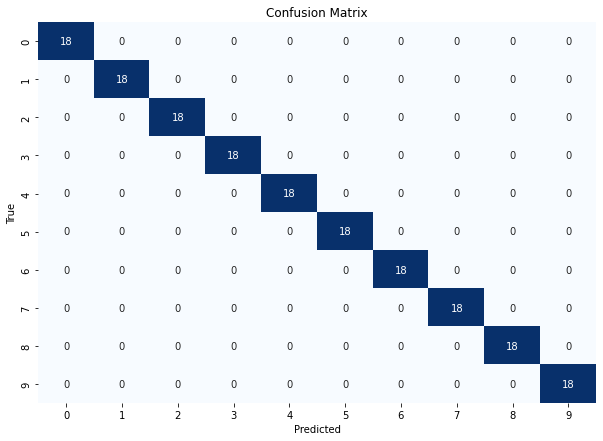

12k_DE_1
selected_33_fts.csv


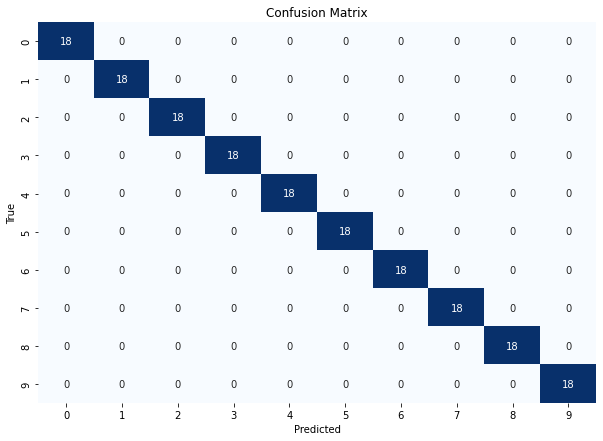

12k_DE_2
selected_34_fts.csv


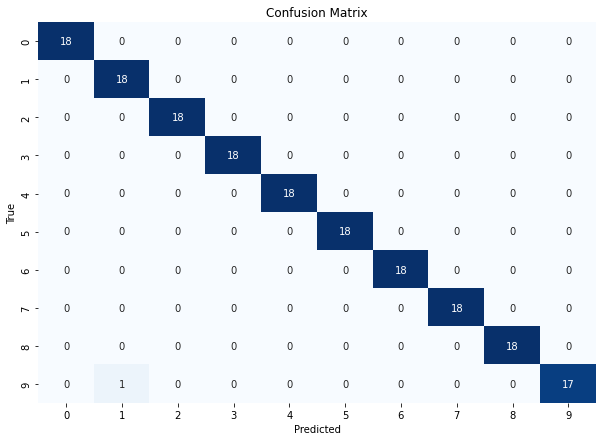

12k_DE_3
selected_35_fts.csv


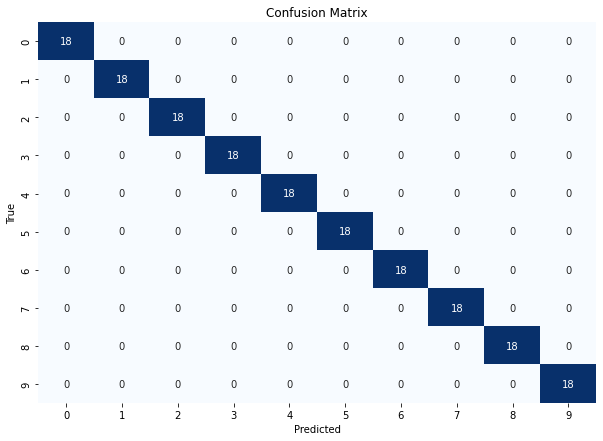

['gl_mrmr_svm_reports.joblib']

In [16]:
# Load the all the svm model
gl_mrmr_svm_models = load('gl_mrmr_svm_models.joblib')

# For multi_trials
random_states = [i for i in range(10)] 

param_grid = {
        "C": [1, 10, 100],
        "gamma": [0.01, 0.05, 0.1],
        "kernel": ["rbf"]
}

# Number of features
K = [32, 33, 34, 35]
#k = 35
# For each dataset..
all_dataset_exp = {}
i = 0
for data_path in data_paths:
    file = f'selected_{K[i]}_fts.csv'
    print(data_path)
    print(file)
    #model = gl_mrmr_svm_models[f'{data_path}'][k][0]
    # Test 10 times
    each_trial = {}
    for random_state in random_states:
        model = svm_model(path=data_path, file=file, random_state=random_state, param_grid=param_grid)[0]
        one_trial_report, cm = classify_svm(path=data_path, file=file, model=model, test_size=180, random_state=random_state, show=False)
        each_trial[f'rnd_{random_state}'] = one_trial_report
    all_dataset_exp[f'{data_path}'] = each_trial
    plot_confusion_matrix_(cm, data_path, model='svm')
    
    i += 1

dump(all_dataset_exp, 'gl_mrmr_svm_reports.joblib')

In [12]:
gl_mrmr_svm_reports = load('gl_mrmr_svm_reports.joblib')
overall_eval_gl = overall_model_eval(gl_mrmr_svm_reports)

12k_DE_0
accuracy: Mean = 0.9994, std = 0.0017
precision: Mean = 0.9995, std = 0.0016
recall: Mean = 0.9994, std = 0.0017
f1-score: Mean = 0.9994, std = 0.0017
---------------------
12k_DE_1
accuracy: Mean = 0.9989, std = 0.0022
precision: Mean = 0.9989, std = 0.0021
recall: Mean = 0.9989, std = 0.0022
f1-score: Mean = 0.9989, std = 0.0022
---------------------
12k_DE_2
accuracy: Mean = 0.9961, std = 0.0043
precision: Mean = 0.9963, std = 0.0042
recall: Mean = 0.9961, std = 0.0043
f1-score: Mean = 0.9961, std = 0.0043
---------------------
12k_DE_3
accuracy: Mean = 0.9972, std = 0.0037
precision: Mean = 0.9974, std = 0.0035
recall: Mean = 0.9972, std = 0.0037
f1-score: Mean = 0.9972, std = 0.0037
---------------------


In [17]:
f1_gl_mrmr_svm =  f1_score_class(gl_mrmr_svm_reports, model='svm')

12k_DE_0
0.0_f1-score: Mean = 1.0000, std = 0.0000
1.0_f1-score: Mean = 1.0000, std = 0.0000
2.0_f1-score: Mean = 1.0000, std = 0.0000
3.0_f1-score: Mean = 1.0000, std = 0.0000
4.0_f1-score: Mean = 1.0000, std = 0.0000
5.0_f1-score: Mean = 1.0000, std = 0.0000
6.0_f1-score: Mean = 1.0000, std = 0.0000
7.0_f1-score: Mean = 1.0000, std = 0.0000
8.0_f1-score: Mean = 0.9971, std = 0.0086
9.0_f1-score: Mean = 0.9973, std = 0.0081
---------------------
12k_DE_1
0.0_f1-score: Mean = 1.0000, std = 0.0000
1.0_f1-score: Mean = 1.0000, std = 0.0000
2.0_f1-score: Mean = 1.0000, std = 0.0000
3.0_f1-score: Mean = 1.0000, std = 0.0000
4.0_f1-score: Mean = 1.0000, std = 0.0000
5.0_f1-score: Mean = 0.9943, std = 0.0114
6.0_f1-score: Mean = 1.0000, std = 0.0000
7.0_f1-score: Mean = 1.0000, std = 0.0000
8.0_f1-score: Mean = 1.0000, std = 0.0000
9.0_f1-score: Mean = 0.9946, std = 0.0108
---------------------
12k_DE_2
0.0_f1-score: Mean = 1.0000, std = 0.0000
1.0_f1-score: Mean = 0.9865, std = 0.0135
2.0_f

In [22]:
f1_gl_mrmr_svm = {}
for key, values in f1_each_class_cnn.items():
    f1_gl_mrmr_svm[key] = []
    for f1_class in values.values():
        f1_gl_mrmr_svm[key].append(f1_class[0])

In [57]:
f1_gl_mrmr_svm

{'12k_DE_0': [1.0,
  1.0,
  0.9488694393535175,
  1.0,
  0.9915216682958619,
  0.9911463187325257,
  0.9657928027098774,
  0.935240430657632,
  0.995674183156926,
  0.9117146967146967],
 '12k_DE_1': [1.0,
  1.0,
  0.9720447720447721,
  1.0,
  1.0,
  0.986391147768197,
  0.9952380952380953,
  0.9549015911515912,
  0.995674183156926,
  0.940000830323411],
 '12k_DE_2': [1.0,
  0.9971428571428571,
  0.9529885100723012,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9584360841358812,
  0.9965517241379309],
 '12k_DE_3': [0.9954545454545455,
  0.9895195195195194,
  0.9674060365972131,
  1.0,
  1.0,
  0.9971428571428571,
  1.0,
  1.0,
  0.9501577951189464,
  1.0]}

# F1-Score comparision

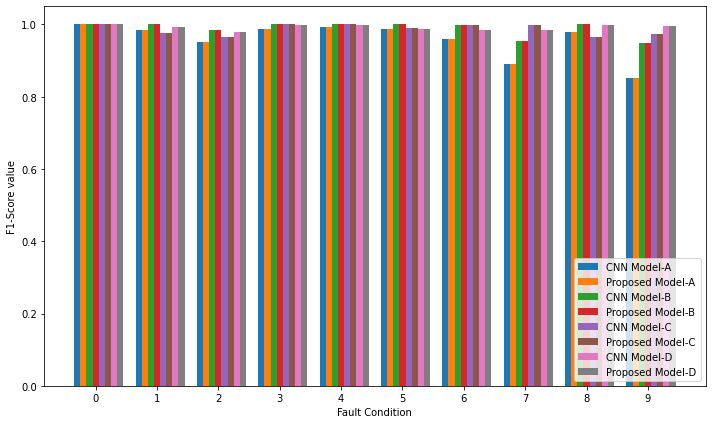

In [23]:
# Fault conditions
conditions = [i for i in range(10)]

a, b, c, d = f1_cnn.keys()

# F-Score values for each model (dummy data for demonstration)
cnn_a = f1_cnn[a]
cnnepdnn_a = f1_gl_mrmr_svm[a]

cnn_b = f1_cnn[b]
cnnepdnn_b = f1_gl_mrmr_svm[b]

cnn_c = f1_cnn[c]
cnnepdnn_c = f1_gl_mrmr_svm[c]

cnn_d = f1_cnn[d]
cnnepdnn_d = f1_gl_mrmr_svm[d]

# Data
data = np.array([cnn_a, cnnepdnn_a, cnn_b, cnnepdnn_b, cnn_c, cnnepdnn_c, cnn_d, cnnepdnn_d])

# Plotting
x = np.arange(len(conditions))
width = 0.1  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - 3*width, cnn_a, width, label='CNN Model-A')
ax.bar(x - 2*width, cnnepdnn_a, width, label='Proposed Model-A')
ax.bar(x - width, cnn_b, width, label='CNN Model-B')
ax.bar(x, cnnepdnn_b, width, label='Proposed Model-B')
ax.bar(x + width, cnn_c, width, label='CNN Model-C')
ax.bar(x + 2*width, cnnepdnn_c, width, label='Proposed Model-C')
ax.bar(x + 3*width, cnn_d, width, label='CNN Model-D')
ax.bar(x + 4*width, cnnepdnn_d, width, label='Proposed Model-D')

# Labels and title
ax.set_xlabel('Fault Condition')
ax.set_ylabel('F1-Score value')
#ax.set_title('F1-Score value of ten condition fault in four dataset')
ax.set_xticks(x)
ax.set_xticklabels(conditions)
ax.legend(loc='lower right')

# Show plot
plt.tight_layout()
plt.savefig('./plot/f1_comparison.png')
plt.show()


# Features learning

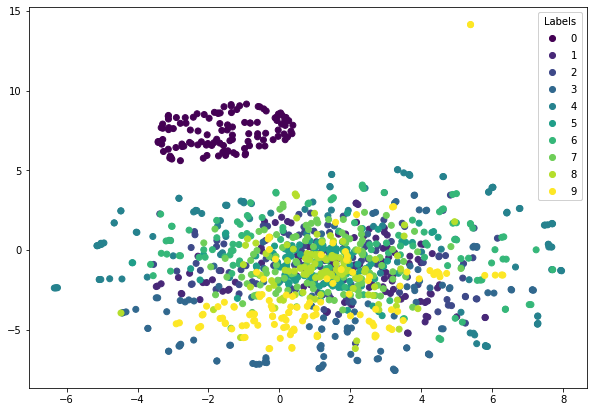

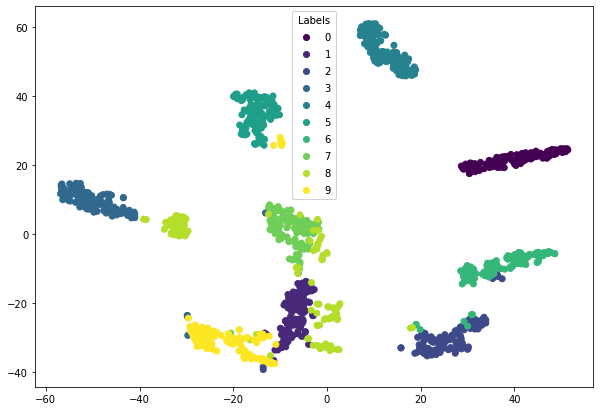

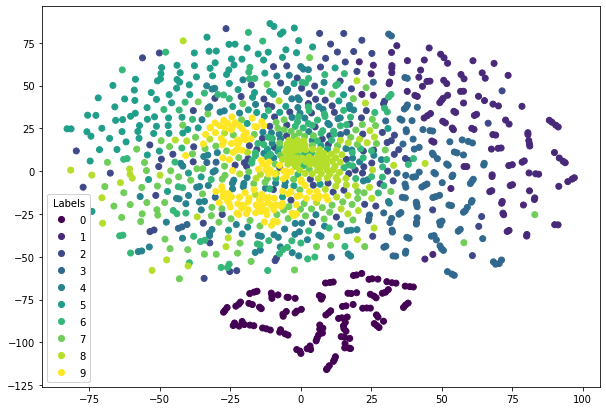

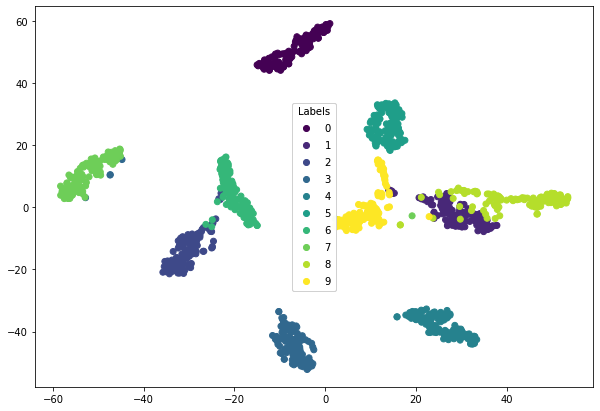

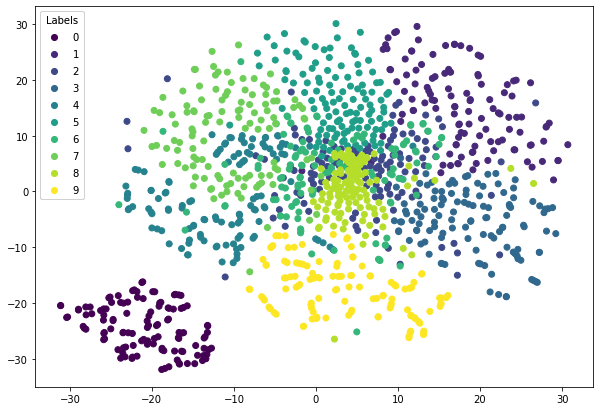

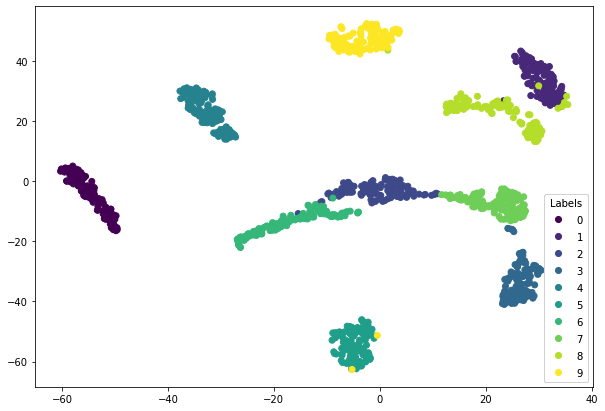

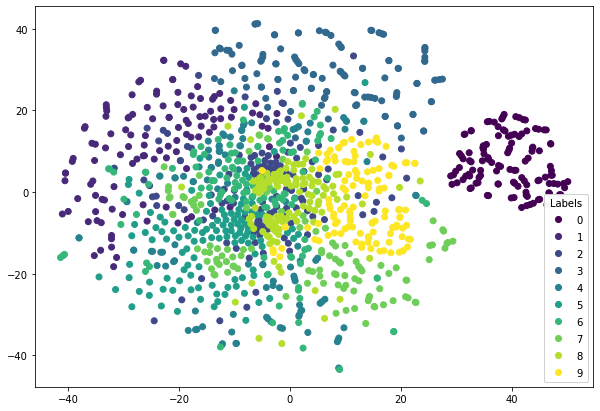

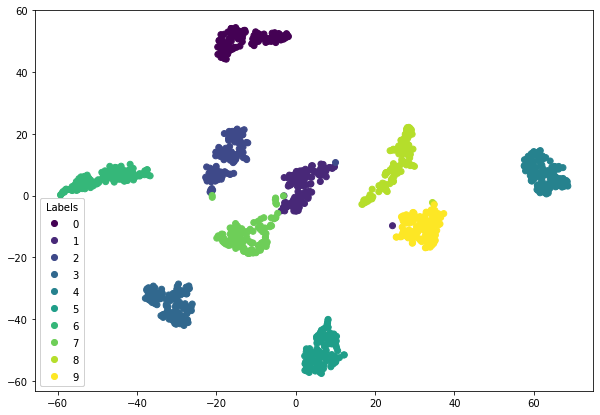

In [59]:
from sklearn.manifold import TSNE

K = [32, 33, 34, 35]
i = 0

for data_path in data_paths:
    # Load the data
    df1 = pd.read_csv(f'{data_path}/processed.csv')
    df2 = pd.read_csv(f'{data_path}/selected_{K[i]}_fts.csv')
    i+=1
    #df2 = pd.read_csv('12k_DE_1/fused_fts.csv')


    # Extract labels and features
    labels1 = df1.iloc[:, 0]
    features1 = df1.iloc[:, 1:]

    labels2 = df2.iloc[:, 0]
    features2 = df2.iloc[:, 1:]

    # Apply t-SNE to the datasets
    tsne1 = TSNE(n_components=2, random_state=0)
    features1_tsne = tsne1.fit_transform(features1)

    tsne2 = TSNE(n_components=2, random_state=0)
    features2_tsne = tsne2.fit_transform(features2)

    # Plot t-SNE results with legends
    fig, axes = plt.subplots(figsize=(10, 7))
    
    
    # Plot for Dataset 1
    scatter1 = axes.scatter(features1_tsne[:, 0], features1_tsne[:, 1], c=labels1, cmap='viridis')
    #axes[0].set_title('t-SNE Visualization of Dataset 1 (1024 features)')
    #axes[0].set_xlabel('t-SNE component 1')
    #axes[0].set_ylabel('t-SNE component 2')
    legend1 = axes.legend(*scatter1.legend_elements(), title="Labels")
    axes.add_artist(legend1)
    
    plt.savefig(f'./plot/tsne_raw_{data_path}.png')

    # Plot t-SNE results with legends
    fig, axes = plt.subplots(figsize=(10, 7))
    
    # Plot for Dataset 2
    scatter2 = axes.scatter(features2_tsne[:, 0], features2_tsne[:, 1], c=labels2, cmap='viridis')
    #axes[1].set_title('t-SNE Visualization of Dataset 2 (16 features)')
    #axes[1].set_xlabel('t-SNE component 1')
    #axes[1].set_ylabel('t-SNE component 2')
    legend2 = axes.legend(*scatter2.legend_elements(), title="Labels")
    axes.add_artist(legend2)

    #plt.tight_layout()
    plt.savefig(f'./plot/tsne_{data_path}.png')
    
    plt.show()